In [1]:
import numpy as np # used for scientific computing\n",
import pandas as pd # used for data analysis and manipulation\n",
import matplotlib.pyplot as plt # used for visualization and plotting\n",

In [2]:
import matplotlib.cm as cm 

In [3]:
import math

In [4]:
from sklearn.cluster import KMeans 

In [5]:
# read the data
df = pd.read_excel('Data/1500 SAs 21 Resources - For IDC.xlsx')

In [6]:
# verify the data
df

,_,AppointmentNumber,DurationInMinutes,Latitude,Longitude,Grid_Number__c,EarliestStartTime,DueDate,SchedStartTime,SchedEndTime
0,[ServiceAppointment],SA-000093262,4,19.477956,-99.180741,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:18:00.000+0000,2021-07-21T13:22:00.000+0000
1,[ServiceAppointment],SA-000091887,4,19.477956,-99.180741,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:22:00.000+0000,2021-07-21T13:26:00.000+0000
2,[ServiceAppointment],SA-000093274,4,19.477937,-99.180605,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:26:00.000+0000,2021-07-21T13:30:00.000+0000
3,[ServiceAppointment],SA-000091881,4,19.477937,-99.180605,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T13:30:00.000+0000,2021-07-21T13:34:00.000+0000
4,[ServiceAppointment],SA-000100570,4,19.477937,-99.180605,37739.12911,2021-07-20T05:12:00.000+0000,2021-08-28T00:00:00.000+0000,2021-07-21T13:34:00.000+0000,2021-07-21T13:38:00.000+0000
...,...,...,...,...,...,...,...,...,...,...
1495,[ServiceAppointment],SA-000100513,2,19.480504,-99.180529,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-28T00:00:00.000+0000,2021-07-21T21:37:00.000+0000,2021-07-21T21:39:00.000+0000
1496,[ServiceAppointment],SA-000091560,2,19.480362,-99.180432,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T21:40:00.000+0000,2021-07-21T21:42:00.000+0000
1497,[ServiceAppointment],SA-000091581,2,19.480650,-99.180485,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T21:43:00.000+0000,2021-07-21T21:45:00.000+0000
1498,[ServiceAppointment],SA-000091572,2,19.480748,-99.180456,37741.12911,2021-07-20T05:12:00.000+0000,2021-08-20T00:00:00.000+0000,2021-07-21T21:46:00.000+0000,2021-07-21T21:48:00.000+0000


In [7]:
# radius of the Earth
R = 6373.0

def compute_distance(place_1, place_2):
    """
    compute the distance between two lat-long coordinates

    Input:

    place_1 - tuple : (latitude, longitude) of place 1
    place_2 - tuple : (latitude, longitude) of place 2

    Returns:
    distance - float number 
    """    

    distance_lat = place_2[0] - place_1[0]
    distance_long = place_2[1] - place_1[1]

    #Haverinse formula 
    x = math.sin(distance_lat / 2)**2 + math.cos(place_1[0]) * math.cos(place_2[0]) * math.sin(distance_long / 2)**2

    y = 2 * math.atan2(math.sqrt(x), math.sqrt(1 - x))

    return R * y

In [8]:
def plot(c): 
    plt.scatter(df['Latitude'], df['Longitude'], color=c)

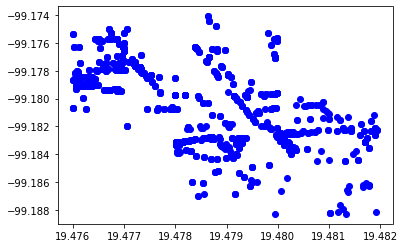

In [9]:
# map of the jobs
plot('blue')

In [10]:
# extract the relvent columns
dataset = np.array(df[['Latitude', 'Longitude']])

In [11]:
# verify the exctraction
dataset

array([[ 19.477956, -99.180741],
       [ 19.477956, -99.180741],
       [ 19.477937, -99.180605],
       ...,
       [ 19.48065 , -99.180485],
       [ 19.480748, -99.180456],
       [ 19.480797, -99.180442]])

In [12]:
# K to check for the KMeans
Ks = [5, 10, 15, 18, 20, 22, 25, 30, 35, 40, 45, 50]

In [13]:
# execute KMeans for each K in Ks
inertia_lst = []
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=0)
    # fit the data
    _ = kmeans.fit_predict(dataset)
    # save inertia
    inertia_lst.append(kmeans.inertia_)

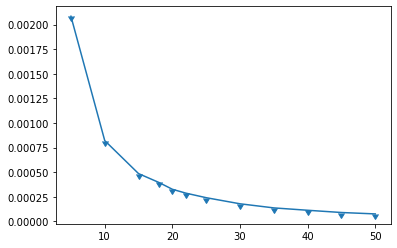

In [14]:
# plot inertia as function of number of clusers (k)
plt.plot(Ks, inertia_lst, marker=11)

finding the elbow is the method to find the best K. 
we need to find a script to do it automatticly. 
In the meantime, we can see that in this case the best k is 15.

In [15]:
# best k = 15 , Ks[2]
best_k_idx = 2
best_k = 15

In [16]:
# get the best KMeans 
best_kmeans = KMeans(n_clusters=best_k, random_state=0)

In [17]:
# finding the elbow

In [18]:
# seperate the instances to clusters

# get labels 
labels = best_kmeans.fit_predict(dataset)

# init dictionary
dict_of_clusters = {cluster: [] for cluster in range(best_k)}

for idx, instance in enumerate(dataset):
    dict_of_clusters[labels[idx]].append(instance)

In [19]:
# print cluster sizes
for cluster, instances in dict_of_clusters.items():
    print(f'------Cluster {cluster}: {len(instances)} jobs --------')
    print()

------Cluster 0: 131 jobs --------

------Cluster 1: 163 jobs --------

------Cluster 2: 73 jobs --------

------Cluster 3: 120 jobs --------

------Cluster 4: 250 jobs --------

------Cluster 5: 116 jobs --------

------Cluster 6: 37 jobs --------

------Cluster 7: 153 jobs --------

------Cluster 8: 68 jobs --------

------Cluster 9: 38 jobs --------

------Cluster 10: 117 jobs --------

------Cluster 11: 68 jobs --------

------Cluster 12: 99 jobs --------

------Cluster 13: 48 jobs --------

------Cluster 14: 19 jobs --------



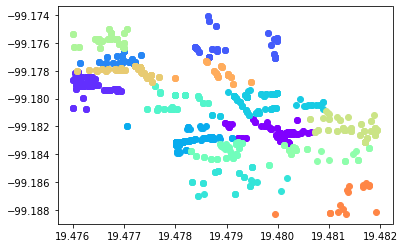

In [20]:
# plot the results
clusters = [c for c in range(best_k)]
colors = cm.rainbow(np.linspace(0, 1, Ks[3]))
for cluster, c in zip(clusters, colors):
    data = np.array(dict_of_clusters[cluster])
    plt.scatter(data[:, 0], data[:, 1], color=c)

## order the clusters

In [21]:
# print the centers
centers = best_kmeans.cluster_centers_
centers

array([[ 19.47992919, -99.18243661],
       [ 19.4763162 , -99.17903315],
       [ 19.47908584, -99.1762854 ],
       [ 19.4769335 , -99.1770622 ],
       [ 19.47822456, -99.18302867],
       [ 19.47962001, -99.18023726],
       [ 19.47908578, -99.18583278],
       [ 19.47802676, -99.17991843],
       [ 19.47901815, -99.18384806],
       [ 19.48071371, -99.18380566],
       [ 19.47676572, -99.17584279],
       [ 19.48145476, -99.18222701],
       [ 19.47709691, -99.17800164],
       [ 19.4788635 , -99.17818931],
       [ 19.48137995, -99.18716968]])

In [23]:
# order the clusters according to distance from cluster 0 

d_array = [(0,0)]
c_0 = centers[0]
for idx, c in enumerate(centers[1:]):
    d_array += [(compute_distance(c_0, c), idx + 1)]
cluster_distance = sorted(d_array, key=lambda x: x[0]) 

dict_cluster_to_idx = {c[1] : idx for idx, c in enumerate(cluster_distance)}

idx_res_column = []

# for each row add the relevent number according to the order of the clusters
for label in labels:
    idx_res_column += [dict_cluster_to_idx[label]]    

In [24]:
# add the column to the dataFrame
df['Index'] = idx_res_column

In [25]:
# craete result new excel
df.to_excel('results_1.xlsx', sheet_name='results')